In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [54]:
gold_data = pd.read_csv('C:\\Users\\saken\\Downloads\\indian_gold_price.csv')

In [55]:
gold_data.head()

,Date,GLD,Nifty,USD\INR
0,06-08-2018,1210.6,11387.09961,69.080002
1,13-08-2018,1192.2,11355.75000,69.779999
2,20-08-2018,1187.8,11551.75000,70.275002
3,27-08-2018,1209.2,11691.95020,70.995003
4,03-09-2018,1206.3,11582.34961,72.095001


In [56]:
gold_data.tail()

,Date,GLD,Nifty,USD\INR
191,20-06-2022,1840.55,15350.15039,78.142403
192,27-06-2022,1824.80,15832.04981,78.962997
193,04-07-2022,1810.05,15835.34961,79.332397
194,11-07-2022,1731.70,16216.00000,79.685204
195,18-07-2022,1710.20,16278.50000,79.876503


In [57]:
gold_data.describe()

,GLD,Nifty,USD\INR
count,196.000000,196.000000,196.000000
mean,1647.660714,13278.027829,73.295163
std,253.296079,2731.487305,2.439000
min,1185.800000,7610.250000,68.440002
25%,1425.275000,11132.512452,71.352199
50%,1751.000000,11967.174810,73.491452
75%,1844.875000,15832.624760,74.883000
max,2027.300000,18477.050780,79.876503


In [58]:
correlation = gold_data.corr()

C:\Users\saken\AppData\Local\Temp\ipykernel_10996\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

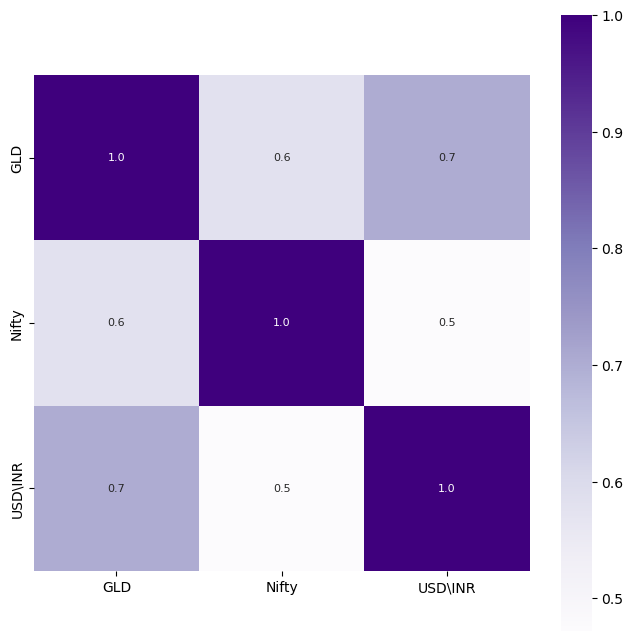

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Purples')

In [60]:
print(correlation['GLD'])

GLD        1.000000
Nifty      0.579970
USD\INR    0.702628
Name: GLD, dtype: float64


C:\Users\saken\AppData\Local\Temp\ipykernel_10996\3997289462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['Gold Price'],color='blue')


<Axes: xlabel='Gold Price', ylabel='Density'>

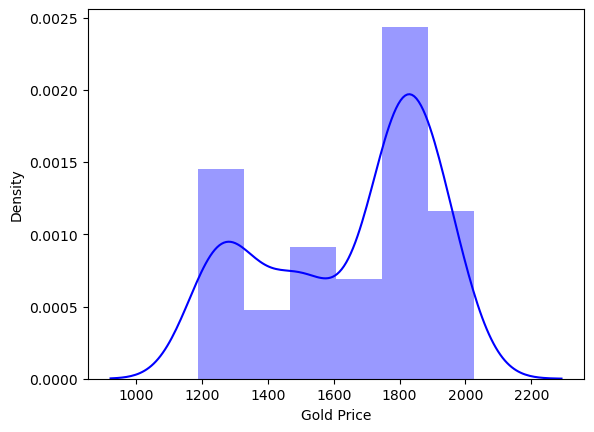

In [36]:
sns.distplot(gold_data['Gold Price'],color='blue')

In [37]:
X = gold_data.drop(['Date','Gold Price'],axis=1)
Y = gold_data['Gold Price']

In [38]:
print(X)

           Nifty    USD\INR
0    11387.09961  69.080002
1    11355.75000  69.779999
2    11551.75000  70.275002
3    11691.95020  70.995003
4    11582.34961  72.095001
..           ...        ...
191  15350.15039  78.142403
192  15832.04981  78.962997
193  15835.34961  79.332397
194  16216.00000  79.685204
195  16278.50000  79.876503

[196 rows x 2 columns]


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [62]:
regressor = RandomForestRegressor(n_estimators=10)

In [63]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10)

In [64]:
test_data_prediction = regressor.predict(X_test)

In [65]:
print(test_data_prediction)

[1683.08  1674.2   1846.6   1813.63  1904.58  1828.19  1301.375 1880.045
 1284.03  1279.72  1365.4   1794.92  1913.76  1483.195 1353.97  1299.125
 1220.15  1836.73  1414.35  1293.15  1941.52  1814.25  1802.9   1954.52
 1325.745 1837.99  1849.88  1831.75  1691.35  1955.05  1422.75  1260.64
 1942.68  1802.06  1716.15  1873.02  1301.375 1723.82  1804.01  1803.15 ]


In [66]:
regressor.score(X_test, Y_test)

0.7458434883734667

In [67]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7458434883734667


In [68]:
Y_test = list(Y_test)

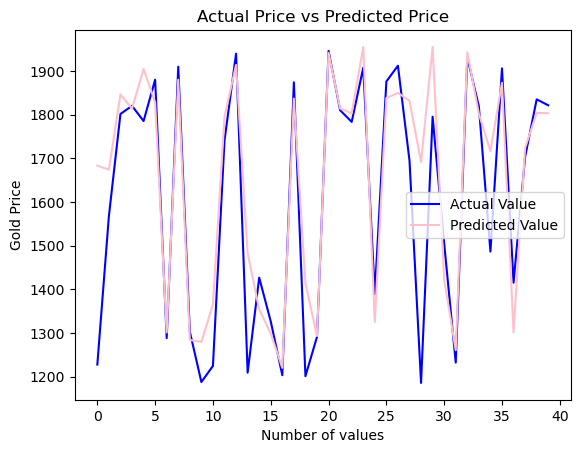

In [69]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, '31-01-2022'),
  Text(0.0, 0, '06-08-2018'),
  Text(25.0, 0, '28-01-2019'),
  Text(50.0, 0, '05-08-2019'),
  Text(75.0, 0, '24-02-2020'),
  Text(100.0, 0, '31-08-2020'),
  Text(125.0, 0, '08-03-2021'),
  Text(150.0, 0, '06-09-2021'),
  Text(175.0, 0, '28-02-2022'),
  Text(200.0, 0, ''),
  Text(225.0, 0, '')])

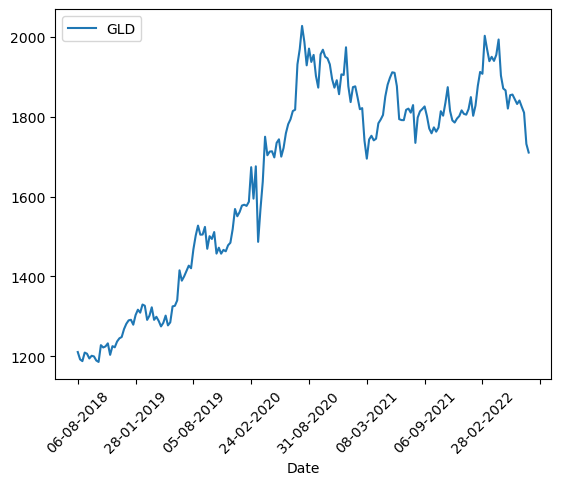

In [78]:
gold_data.plot(x = "Date", y ='GLD')
plt.xticks(rotation = 45)

In [79]:
newData = gold_data[['Nifty','USD\INR']].tail(1)

In [80]:
pr = regressor.predict(newData)

In [81]:
pr

array([1727.85])

In [84]:
import pickle
pickle_out = open("Regressor.pkl","wb")
pickle.dump( regressor,pickle_out)
pickle_out.close()

In [85]:
regressor.predict([[21817.45,83.10]])

C:\Users\saken\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1756.16])